In [88]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
file = np.genfromtxt('catRawMags1305/catDir/flcDRCpos1106_f606w.dat',names=True)

In [3]:
drc = np.genfromtxt('catRawMags1305/catDir/drc_useful_f606w.dat',names=True)

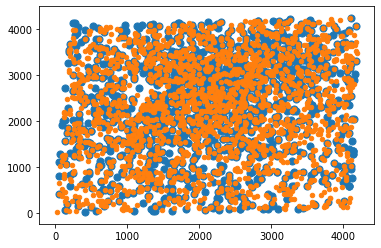

In [4]:
fig, ax = plt.subplots()


ax.scatter(drc['x'],drc['y'],s=50)
ax.scatter(file['xDRC'],file['yDRC'],s=20)



plt.show()

In [5]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf_file = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT',names=True)

In [6]:
match = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf1106.dat',names=True)

In [83]:
xmD = match['xPSF_mas']-match['xPSF_trans']
ymD = match['yPSF_mas']-match['yPSF_trans']

print('Number of Matches:',len(match))
print('Max X Diff:',max(abs(xmD)))
print('Median X Diff:',np.median(xmD))
print('STD X Diff:',np.std(xmD))
print('Max Y Diff:',max(abs(ymD)))
print('Median Y Diff:',np.median(ymD))
print('STD Y Diff:',np.std(ymD))

Number of Matches: 1566
Max X Diff: 1.9853910000001633
Median X Diff: 0.10032200000000557
STD X Diff: 0.5006931812151443
Max Y Diff: 1.973163999999997
Median Y Diff: -0.07188000000041939
STD Y Diff: 0.5101775761180772


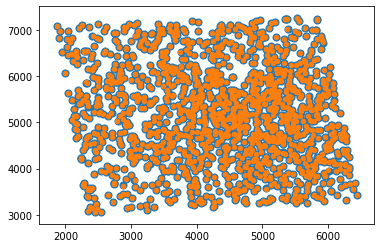

In [7]:
fig, ax = plt.subplots()

# ax.scatter(psf_file['x'],psf_file['y'])
ax.scatter(match['xPSF_mas'],match['yPSF_mas'],s=50)
ax.scatter(match['xPSF_trans'],match['yPSF_trans'],s=20)

plt.show()

In [8]:
all = np.genfromtxt('catRawMags1305/catDir/matchedPSFpsf1106.dat',names=True)

In [80]:
xpD = all['xPSF_trans_f606w']-all['xPSF_trans_f814w']
ypD = all['yPSF_trans_f606w']-all['yPSF_trans_f814w']
print(max(abs(xpD)))
print(max(abs(ypD)))

2.8988859999999477
2.5368740000003527


In [29]:
g_idx = np.logical_and(all['magPSF_f606w']>10,all['magPSF_f814w']>10)

all = all[g_idx]

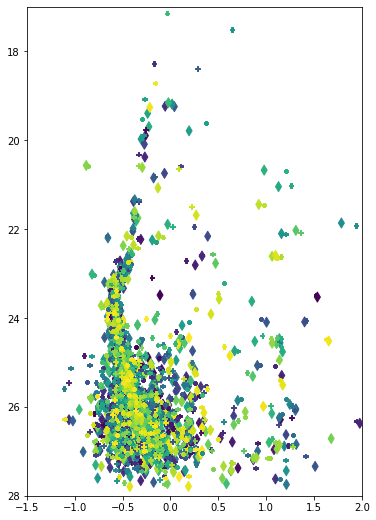

In [36]:
fig, ax = plt.subplots(figsize=(6,9))

c= np.arange(0,len(all),1)

ax.scatter(all['magZPT_f606w']-all['magZPT_f814w'],all['magZPT_f606w'],s=50,c=c,marker='d')
ax.scatter(all['magPSF_f606w']-all['magPSF_f814w'],all['magPSF_f606w'],s=20,c=c,marker='P')


ax.set_ylim(28,17)
ax.set_xlim(-1.5,2)

plt.show()

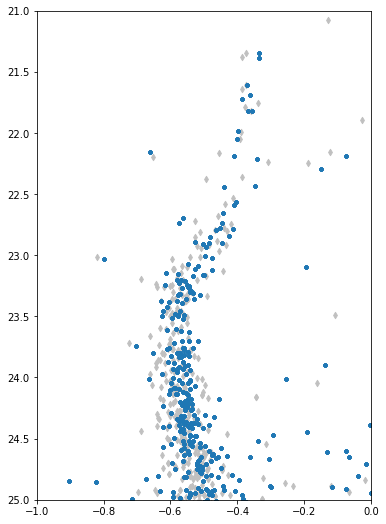

In [31]:
fig, ax = plt.subplots(figsize=(6,9))

c= np.arange(0,len(all),1)

ax.scatter(all['magZPT_f606w']-all['magZPT_f814w'],all['magZPT_f606w'],s=20,marker='d',color='silver')
ax.scatter(all['magPSF_f606w']-all['magPSF_f814w'],all['magPSF_f606w'],s=20,marker='P')


ax.set_ylim(25,21)
ax.set_xlim(-1,0.)

plt.show()

In [32]:
zptCol = all['magZPT_f606w']-all['magZPT_f814w']
psfCol = all['magPSF_f606w']-all['magPSF_f814w']

In [ ]:
colDiff = zptCol-psfCol
colDiffSTD = stats.sigmaclip(zptCol-psfCol,4,4)[0]

In [84]:
print('Number of Matches:',len(colDiff))
print('Mean Color Diff:',np.mean(colDiff))
print('Sigma Clipped Mean:',np.mean(colDiffSTD))
print('Median Color Diff:',np.median(colDiff))
print('Sigma Clipped Median:',np.median(colDiffSTD))
print('STD Color Diff:',np.std(colDiff))
print('Sigma Clipped STD:',np.std(colDiffSTD))

Number of Matches: 1264
Mean: -0.009599118294489608
Sigma Clipped Mean: -0.00823462147281473
Median: -0.011597067925293914
Sigma Clipped Median: -0.011601234591960718
STD: 0.17920384817768276
Sigma Clipped STD: 0.11502005971321602


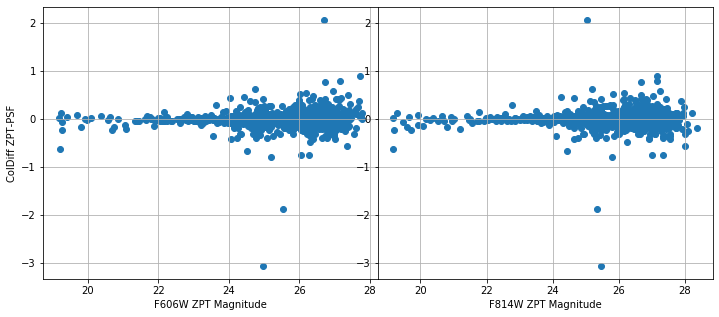

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.scatter(all['magZPT_f606w'],colDiff)
ax2.scatter(all['magZPT_f814w'],colDiff)

ax1.set_ylabel('ColDiff ZPT-PSF')
ax1.set_xlabel('F606W ZPT Magnitude')
ax2.set_xlabel('F814W ZPT Magnitude')

plt.subplots_adjust(wspace=0)

plt.show()

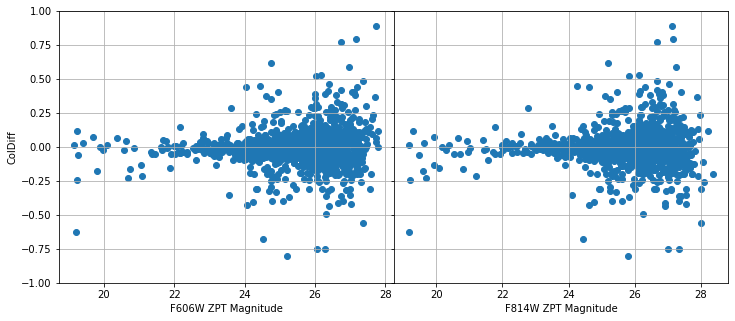

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)

ax1.scatter(all['magZPT_f606w'],colDiff)
ax2.scatter(all['magZPT_f814w'],colDiff)

ax1.set_ylabel('ColDiff')
ax1.set_xlabel('F606W ZPT Magnitude')
ax2.set_xlabel('F814W ZPT Magnitude')

ax1.set_ylim(-1,1)

plt.subplots_adjust(wspace=0)


plt.show()

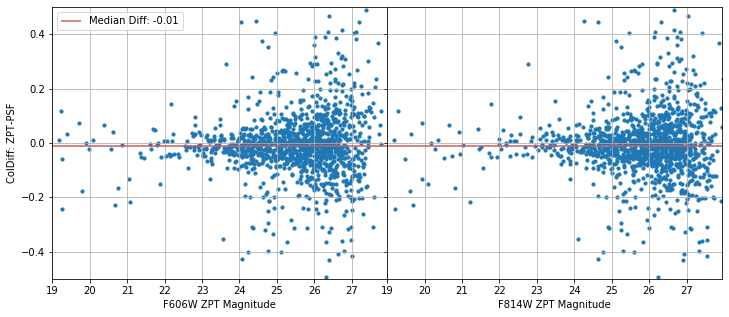

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True,sharex=True)

# plt.rcParams['axes.grid'] = True
ax1.scatter(all['magZPT_f606w'],colDiff,s=10)
ax2.scatter(all['magZPT_f814w'],colDiff,s=10)

ax1.hlines(-0.01,19,28,label='Median Diff: -0.01',color='indianred')
ax2.hlines(-0.01,19,28,color='indianred')
ax1.set_ylabel('ColDiff: ZPT-PSF')
ax1.set_xlabel('F606W ZPT Magnitude')
ax2.set_xlabel('F814W ZPT Magnitude')

ax1.set_ylim(-0.5,0.5)
ax1.set_xlim(19,27.95)

plt.subplots_adjust(wspace=0)

ax1.legend()

# ax1.grid()
# ax2.grid()
plt.show()

(array([  0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,
          0.,   1.,   1.,   7.,   5.,  12.,   2.,  14.,  29.,  39.,  57.,
        131., 263., 287., 160.,  89.,  58.,  25.,  18.,  15.,  12.,   5.,
          6.,   7.,   4.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
       

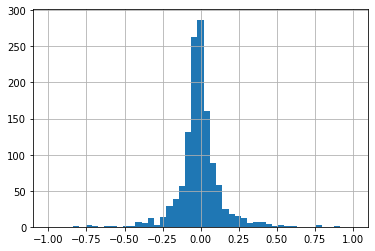

In [72]:
bins = np.linspace(-1,1,50)
plt.hist(colDiff,bins=bins)

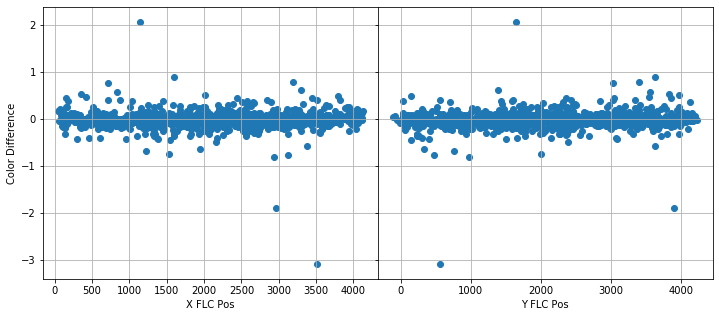

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)

ax1.scatter(all['xt1_f606w'],colDiff)
ax2.scatter(all['yt1_f606w'],colDiff)

ax1.set_xlabel('X FLC Pos')
ax2.set_xlabel('Y FLC Pos')
ax1.set_ylabel('Color Difference')
# ax1.scatter(all['xt1_f814w'],colDiff)
# ax2.scatter(all['yt1_f814w'],colDiff)
plt.subplots_adjust(wspace=0)

plt.show()

In [93]:
model = LinearRegression().fit(all['yt1_f606w'].reshape((-1,1)),colDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
model = LinearRegression().fit(all['yt1_f814w'].reshape((-1,1)),colDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.03229503748239624
slope: [1.00148996e-05]
intercept: -0.03229453708065283
slope: [1.0014093e-05]


In [92]:
model = LinearRegression().fit(all['xt1_f606w'].reshape((-1,1)),colDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

model = LinearRegression().fit(all['xt1_f814w'].reshape((-1,1)),colDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.01184372333385264
slope: [1.06934808e-06]
intercept: -0.011835747534310825
slope: [1.06554706e-06]


In [73]:
flc_match = np.genfromtxt('catRawMags1305/catDir/matchedFLCflc1206.dat',names=True)

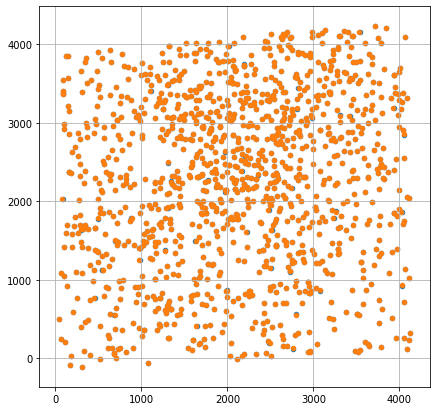

In [75]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(flc_match['xt1_f606w'],flc_match['yt1_f606w'],s=20)
ax.scatter(flc_match['xt1_f814w'],flc_match['yt1_f814w'],s=20)

plt.show()

In [76]:
xDiff = flc_match['xt1_f606w']-flc_match['xt1_f814w']
yDiff = flc_match['yt1_f606w']-flc_match['yt1_f814w']

In [77]:
print('Number of Matches:',len(flc_match))
print('Max XDiff:',max(abs(xDiff)))
print('Mean XDiff:',np.mean(xDiff))
print('Median XDiff:',np.median(xDiff))
print('STD XDiff:',np.std(xDiff))
print('Max XDiff:',max(abs(xDiff)))
print('Mean YDiff:',np.mean(yDiff))
print('Median YDiff:',np.median(yDiff))
print('STD YDiff:',np.std(yDiff))

Mean XDiff: -0.003462331482957483
Median XDiff: -0.013500000000021828
STD XDiff: 0.4573720130304509
Mean YDiff: -0.12807668517050372
Median YDiff: -0.12729999999965003
STD YDiff: 0.443839179706053


In [78]:
print(max(abs(xDiff)))
print(max(abs(yDiff)))

1.993199999999888
1.963700000000017


In [ ]:
# Make CMDs, look at color diff?? No real need... Unless things matched wrong